In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import plotly.offline as py

In [3]:
data = pd.read_csv('/content/sample_data/99Acres_gurgaon_hyderabad_Secunderabad_cleaning_and_featureEng.csv')

In [4]:
data.head()

,Unnamed: 0,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,PRICE_SQFT,AREA,PRICE,BALCONY_NUM,FLOOR_NUM,BHK,LOCALITY,LATITUDE,LONGITUDE,LUXURY
0,0,Residential Apartment,Secunderabad,1,2.0,2,4,1,5,5700.0,1215.0,692500000.0,1,2,2,Manikonda,17.575957,78.471167,Luxury
1,1,Residential Apartment,Hyderabad,1,3.0,4,3,5,30,5428.0,1658.0,9000000.0,3,9,3,Manikonda,17.580482,78.936868,Luxury
2,4,Independent House/Villa,Hyderabad,1,3.0,2,4,6,1,115960.0,3609.0,55000000.0,1,1,3,Manikonda,17.406421,78.616398,Luxury
3,5,Independent/Builder Floor,Hyderabad,1,2.0,4,2,3,2,7964.0,565.0,4500000.0,1,1,2,Manikonda,17.531600,78.267290,Semi-luxury
4,6,Residential Apartment,Hyderabad,1,2.0,1,3,1,5,4771.0,1205.0,57500000.0,1,4,2,Manikonda,17.620662,77.953509,Luxury


In [5]:
data.rename(columns = {'Unnamed: 0' : 'index'}, inplace=True)

In [6]:
data.set_index('index', inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15340 entries, 0 to 18719
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PROPERTY_TYPE  15340 non-null  object 
 1   CITY           15340 non-null  object 
 2   OWNTYPE        15340 non-null  int64  
 3   BEDROOM_NUM    15340 non-null  float64
 4   FURNISH        15340 non-null  int64  
 5   FACING         15340 non-null  int64  
 6   AGE            15340 non-null  int64  
 7   TOTAL_FLOOR    15340 non-null  int64  
 8   PRICE_SQFT     15340 non-null  float64
 9   AREA           15340 non-null  float64
 10  PRICE          15340 non-null  float64
 11  BALCONY_NUM    15340 non-null  int64  
 12  FLOOR_NUM      15340 non-null  int64  
 13  BHK            15340 non-null  int64  
 14  LOCALITY       15340 non-null  object 
 15  LATITUDE       15340 non-null  float64
 16  LONGITUDE      15340 non-null  float64
 17  LUXURY         15340 non-null  object 
dtypes: float64(

In [8]:
data.drop(columns=['PROPERTY_TYPE','CITY','LOCALITY','LUXURY']).corr()['PRICE']

OWNTYPE        0.123348
BEDROOM_NUM   -0.015824
FURNISH       -0.117733
FACING        -0.026822
AGE            0.071876
TOTAL_FLOOR   -0.050041
PRICE_SQFT     0.026014
AREA           0.025816
PRICE          1.000000
BALCONY_NUM   -0.076909
FLOOR_NUM     -0.039619
BHK           -0.019717
LATITUDE      -0.017934
LONGITUDE     -0.068770
Name: PRICE, dtype: float64

In [9]:
data['PROPERTY_TYPE'].value_counts()

PROPERTY_TYPE
Residential Apartment        10537
Independent/Builder Floor     2836
Independent House/Villa       1915
Farm House                      33
Studio Apartment                14
Serviced Apartments              5
Name: count, dtype: int64

In [10]:
data = data[(data['PROPERTY_TYPE'] != 'Farm House') & (data['PROPERTY_TYPE'] != 'Studio Apartment') & (data['PROPERTY_TYPE'] != 'Serviced Apartments')]

<Axes: xlabel='PROPERTY_TYPE', ylabel='PRICE'>

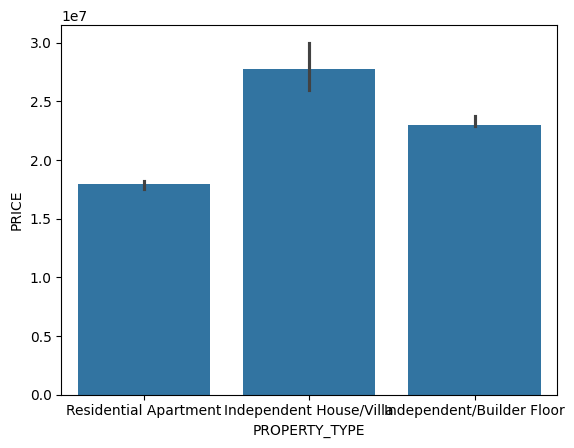

In [11]:
sns.barplot(x=data['PROPERTY_TYPE'], y=data['PRICE'], estimator=np.median)

<Axes: xlabel='PROPERTY_TYPE', ylabel='AREA'>

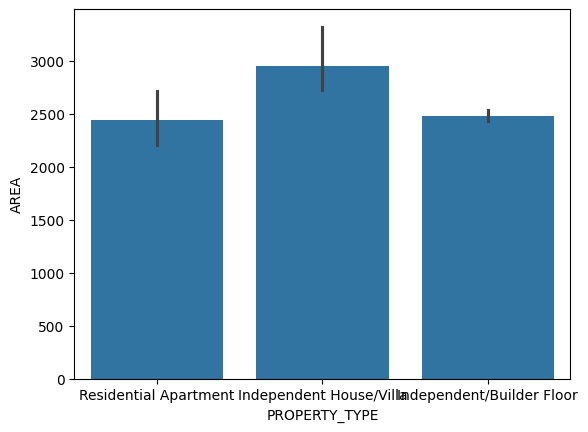

In [12]:
sns.barplot(x=data['PROPERTY_TYPE'], y=data['AREA'])

<Axes: xlabel='PRICE_SQFT', ylabel='PRICE'>

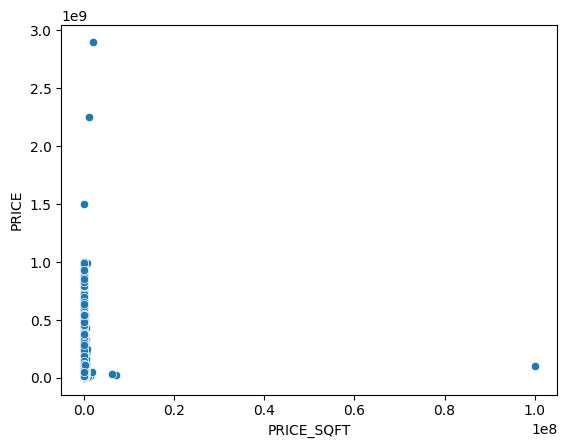

In [13]:
sns.scatterplot(x=data['PRICE_SQFT'], y=data['PRICE'])

In [14]:
data = data[data['PRICE_SQFT'] <= 1.0e+05]

<Axes: xlabel='PRICE_SQFT', ylabel='PRICE'>

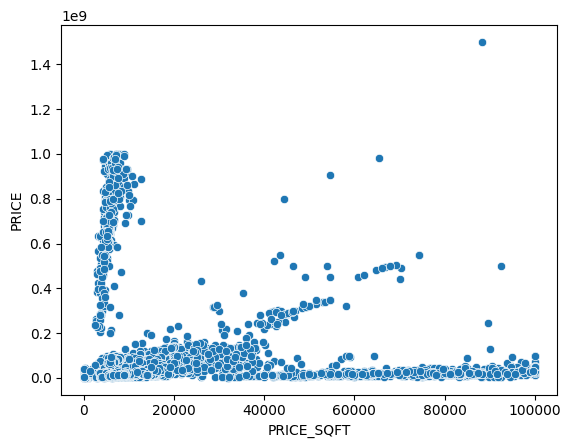

In [15]:
sns.scatterplot(x=data['PRICE_SQFT'], y=data['PRICE'])

In [16]:
data['PRICE_SQFT'].describe()

count     14205.000000
mean      13397.029778
std       16841.323284
min           0.000000
25%        6222.000000
50%        9623.000000
75%       13680.000000
max      100000.000000
Name: PRICE_SQFT, dtype: float64

In [17]:
data[data['PRICE'] <= 7.000000e+03]

,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,PRICE_SQFT,AREA,PRICE,BALCONY_NUM,FLOOR_NUM,BHK,LOCALITY,LATITUDE,LONGITUDE,LUXURY
index,,,,,,,,,,,,,,,,,,
1091,Independent House/Villa,Hyderabad,0,1.0,4,0,3,2,8.0,750.0,7000.0,1,2,1,Manikonda,17.401809,78.560189,Budget
1938,Independent/Builder Floor,Hyderabad,0,2.0,4,3,1,1,5.0,1503.0,7000.0,3,0,2,Manikonda,17.546850,78.365023,Semi-luxury


<Axes: >

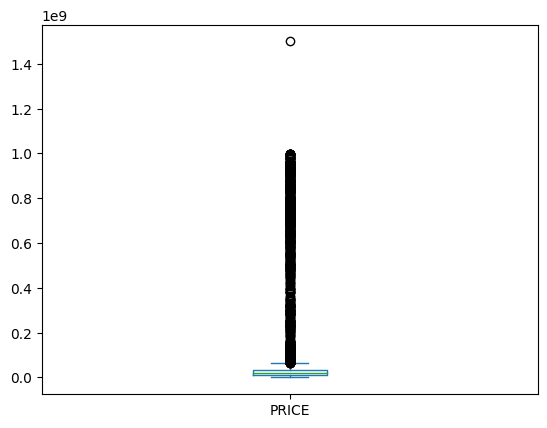

In [18]:
data['PRICE'].plot(kind='box')

In [19]:
data = data[data['PRICE'] < 1.0e+08]

<Axes: >

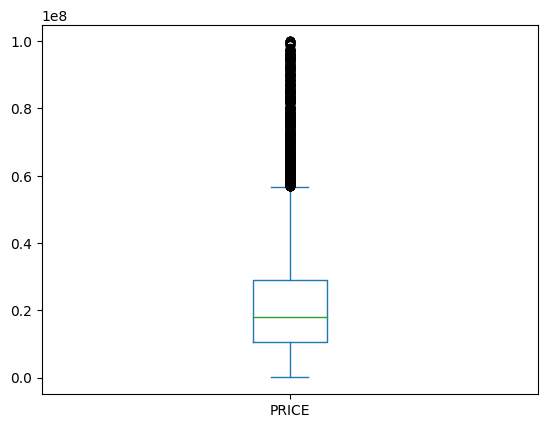

In [20]:
data['PRICE'].plot(kind='box')

In [21]:
data.shape

(13387, 18)

<Axes: xlabel='PRICE_SQFT', ylabel='PRICE'>

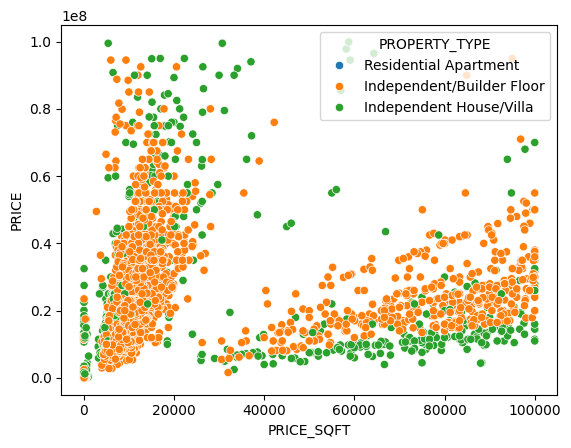

In [22]:
sns.scatterplot(x=data[data['PROPERTY_TYPE'] != 'Residential Apartment']['PRICE_SQFT'], y=data[data['PROPERTY_TYPE'] != 'Residential Apartment']['PRICE'], hue = data['PROPERTY_TYPE'])

In [23]:
data[data['PROPERTY_TYPE'] == 'Independent/Builder Floor']['PRICE_SQFT'].skew()

1.7315644680617954

<Axes: ylabel='Density'>

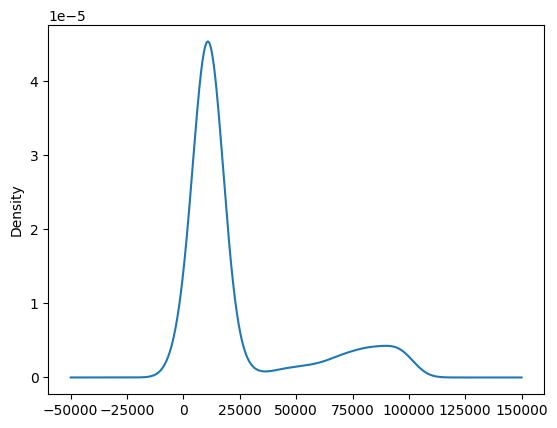

In [24]:
data[data['PROPERTY_TYPE'] == 'Independent/Builder Floor']['PRICE_SQFT'].plot(kind='kde')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13387 entries, 1 to 18719
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PROPERTY_TYPE  13387 non-null  object 
 1   CITY           13387 non-null  object 
 2   OWNTYPE        13387 non-null  int64  
 3   BEDROOM_NUM    13387 non-null  float64
 4   FURNISH        13387 non-null  int64  
 5   FACING         13387 non-null  int64  
 6   AGE            13387 non-null  int64  
 7   TOTAL_FLOOR    13387 non-null  int64  
 8   PRICE_SQFT     13387 non-null  float64
 9   AREA           13387 non-null  float64
 10  PRICE          13387 non-null  float64
 11  BALCONY_NUM    13387 non-null  int64  
 12  FLOOR_NUM      13387 non-null  int64  
 13  BHK            13387 non-null  int64  
 14  LOCALITY       13387 non-null  object 
 15  LATITUDE       13387 non-null  float64
 16  LONGITUDE      13387 non-null  float64
 17  LUXURY         13387 non-null  object 
dtypes: float64(

<Axes: xlabel='AREA', ylabel='PRICE'>

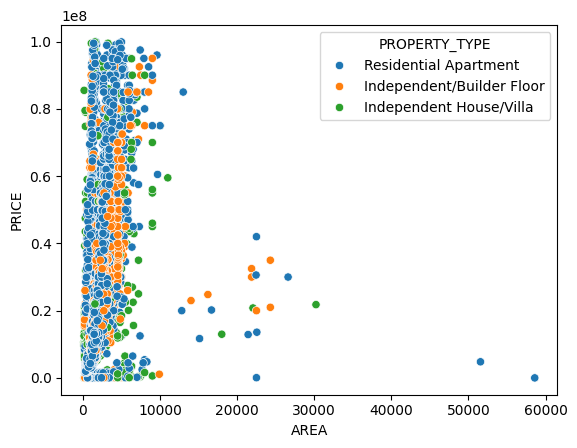

In [26]:
sns.scatterplot(x=data[data['AREA'] < 100000]['AREA'], y=data[data['AREA'] < 100000]['PRICE'], hue=data[data['AREA'] < 100000]['PROPERTY_TYPE'])

In [27]:
data = data[~((data['AREA'] < 500) & (data['PRICE'] > 10000000))]

<Axes: xlabel='AREA', ylabel='PRICE'>

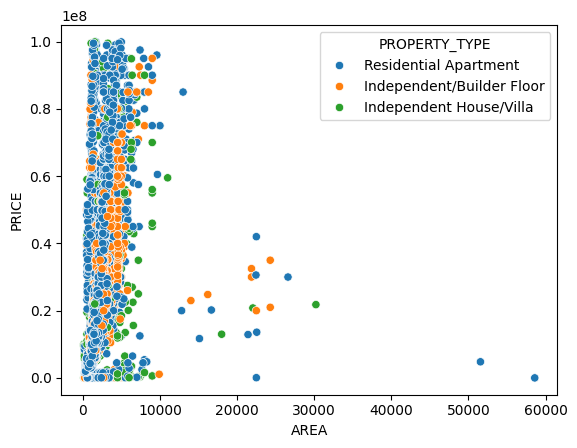

In [28]:
sns.scatterplot(x=data[data['AREA'] < 100000]['AREA'], y=data[data['AREA'] < 100000]['PRICE'], hue=data[data['AREA'] < 100000]['PROPERTY_TYPE'])

<Axes: xlabel='AREA'>

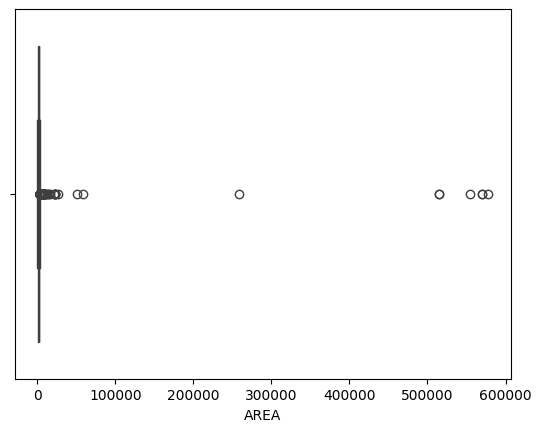

In [29]:
sns.boxplot(x=data[data['PROPERTY_TYPE'] == 'Residential Apartment']['AREA'])

In [30]:
data = data[(data['PROPERTY_TYPE'] != 'Residential Apartment') | (data['AREA'] <= 100000)]

In [31]:
data = data[(data['PROPERTY_TYPE'] != 'Residential Apartment') | (data['AREA'] <= 10000)]

<Axes: xlabel='AREA'>

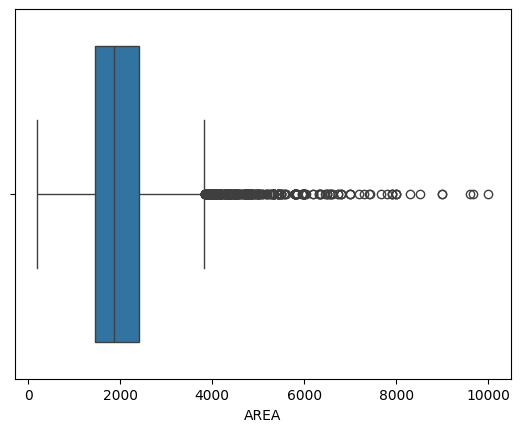

In [32]:
sns.boxplot(x=data[data['PROPERTY_TYPE'] == 'Residential Apartment']['AREA'])

In [33]:
data.shape

(13317, 18)

<Axes: xlabel='AREA'>

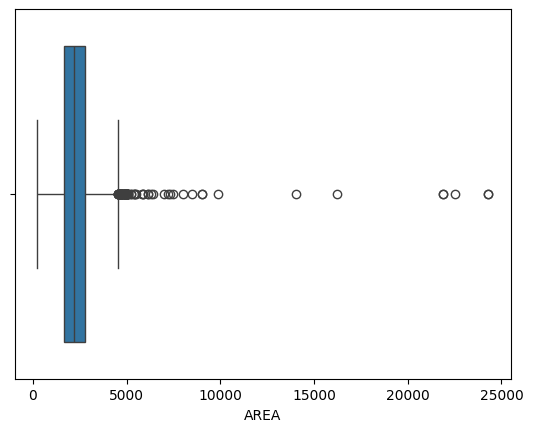

In [34]:
sns.boxplot(x=data[data['PROPERTY_TYPE'] == 'Independent/Builder Floor']['AREA'])

In [35]:
data = data[(data['PROPERTY_TYPE'] != 'Independent/Builder Floor') | (data['AREA'] <= 10000)]

In [36]:
data = data[(data['PROPERTY_TYPE'] != 'Independent/Builder Floor') | (data['AREA'] < 7000)]

<Axes: xlabel='AREA'>

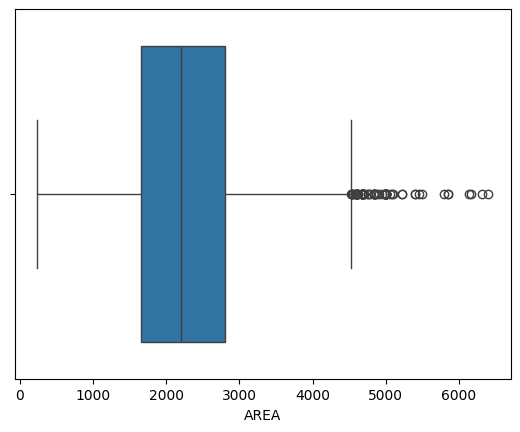

In [37]:
sns.boxplot(x=data[data['PROPERTY_TYPE'] == 'Independent/Builder Floor']['AREA'])

<Axes: xlabel='AREA'>

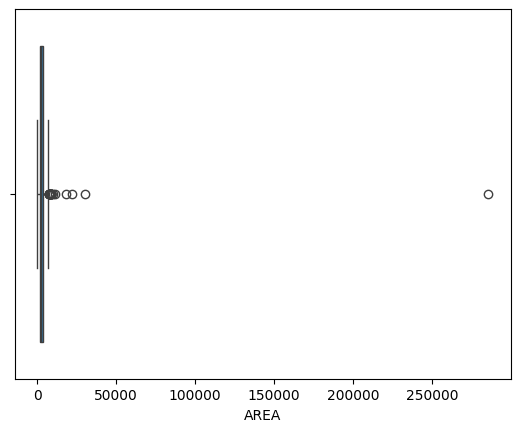

In [38]:
sns.boxplot(x=data[(data['PROPERTY_TYPE'] == 'Independent House/Villa')]['AREA'])

In [39]:
data = data[(data['PROPERTY_TYPE'] != 'Independent House/Villa') | (data['AREA'] <= 50000)]

In [40]:
data = data[(data['PROPERTY_TYPE'] != 'Independent House/Villa') | (data['AREA'] <= 9000)]

<Axes: xlabel='AREA'>

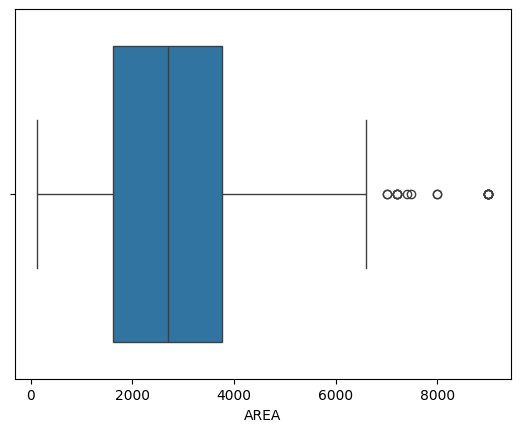

In [41]:
sns.boxplot(x=data[(data['PROPERTY_TYPE'] == 'Independent House/Villa')]['AREA'])

<Axes: xlabel='AREA', ylabel='PRICE'>

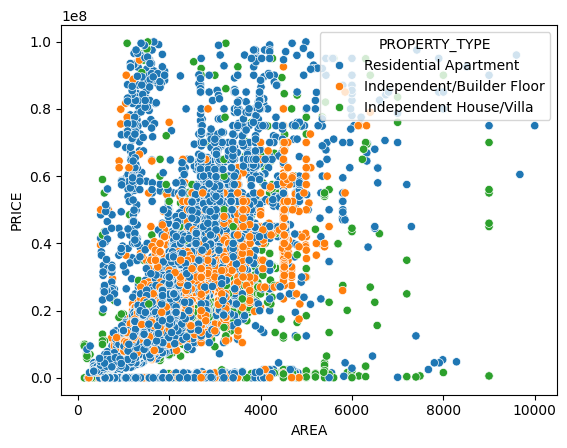

In [42]:
sns.scatterplot(x=data[data['AREA'] < 100000]['AREA'], y=data[data['AREA'] < 100000]['PRICE'], hue=data[data['AREA'] < 100000]['PROPERTY_TYPE'])

In [43]:
data.drop(columns=['PROPERTY_TYPE','CITY','LOCALITY','LUXURY']).corr()['PRICE']

OWNTYPE        0.334582
BEDROOM_NUM    0.365362
FURNISH        0.044396
FACING         0.010843
AGE            0.028429
TOTAL_FLOOR    0.140460
PRICE_SQFT     0.245250
AREA           0.518892
PRICE          1.000000
BALCONY_NUM    0.289863
FLOOR_NUM      0.118925
BHK            0.353893
LATITUDE       0.103168
LONGITUDE      0.010982
Name: PRICE, dtype: float64

<Axes: xlabel='FURNISH', ylabel='PRICE'>

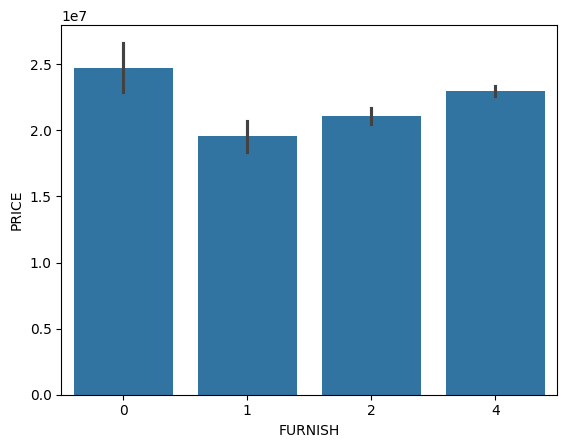

In [44]:
sns.barplot(x=data['FURNISH'], y=data['PRICE'])

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13295 entries, 1 to 18719
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PROPERTY_TYPE  13295 non-null  object 
 1   CITY           13295 non-null  object 
 2   OWNTYPE        13295 non-null  int64  
 3   BEDROOM_NUM    13295 non-null  float64
 4   FURNISH        13295 non-null  int64  
 5   FACING         13295 non-null  int64  
 6   AGE            13295 non-null  int64  
 7   TOTAL_FLOOR    13295 non-null  int64  
 8   PRICE_SQFT     13295 non-null  float64
 9   AREA           13295 non-null  float64
 10  PRICE          13295 non-null  float64
 11  BALCONY_NUM    13295 non-null  int64  
 12  FLOOR_NUM      13295 non-null  int64  
 13  BHK            13295 non-null  int64  
 14  LOCALITY       13295 non-null  object 
 15  LATITUDE       13295 non-null  float64
 16  LONGITUDE      13295 non-null  float64
 17  LUXURY         13295 non-null  object 
dtypes: float64(

<Axes: xlabel='PRICE_SQFT', ylabel='PRICE'>

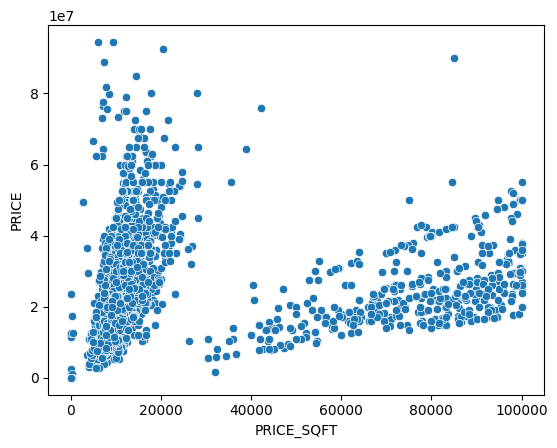

In [46]:
sns.scatterplot(x=data[data['PROPERTY_TYPE'] == 'Independent/Builder Floor']['PRICE_SQFT'], y=data[data['PROPERTY_TYPE'] == 'Independent/Builder Floor']['PRICE'])

In [47]:
# data = data[(data['PROPERTY_TYPE'] != 'Independent/Builder Floor') | (data['PRICE_SQFT'] <= 40000)]

In [48]:
data.drop(columns=['PROPERTY_TYPE','CITY','LOCALITY','LUXURY']).corr()['PRICE']

OWNTYPE        0.334582
BEDROOM_NUM    0.365362
FURNISH        0.044396
FACING         0.010843
AGE            0.028429
TOTAL_FLOOR    0.140460
PRICE_SQFT     0.245250
AREA           0.518892
PRICE          1.000000
BALCONY_NUM    0.289863
FLOOR_NUM      0.118925
BHK            0.353893
LATITUDE       0.103168
LONGITUDE      0.010982
Name: PRICE, dtype: float64

In [49]:
data = data[data['BALCONY_NUM'] != 0]

In [50]:
data['BALCONY_NUM'].value_counts()

BALCONY_NUM
2    4553
3    3352
4    3102
1    2208
Name: count, dtype: int64

In [51]:
data.drop(columns=['PROPERTY_TYPE','CITY','LOCALITY','LUXURY']).corr()['PRICE']

OWNTYPE        0.332966
BEDROOM_NUM    0.363002
FURNISH        0.044942
FACING         0.009876
AGE            0.029238
TOTAL_FLOOR    0.137366
PRICE_SQFT     0.247031
AREA           0.517844
PRICE          1.000000
BALCONY_NUM    0.285905
FLOOR_NUM      0.116850
BHK            0.351440
LATITUDE       0.101983
LONGITUDE      0.010146
Name: PRICE, dtype: float64

<Axes: >

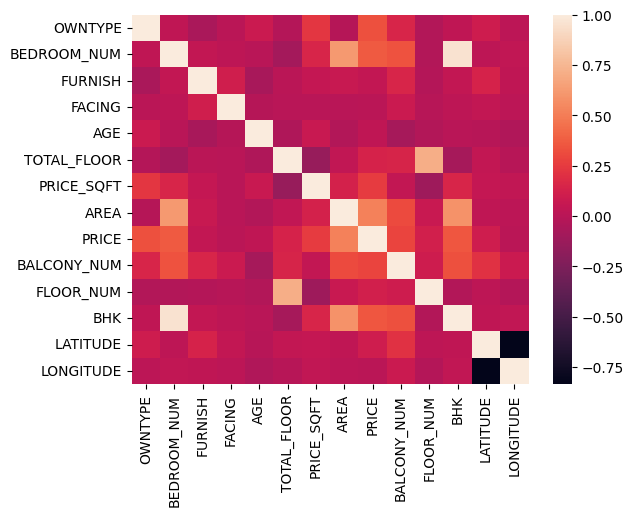

In [55]:
sns.heatmap(data.drop(columns=['PROPERTY_TYPE','CITY','LOCALITY','LUXURY']).corr())